In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
from matplotlib.legend import Legend
import seaborn as sns
rcParams["font.family"] = "sans-serif"
rcParams['font.sans-serif'] = ['DejaVu Sans']

from astropy.coordinates import SkyCoord
from astropy import units as u

import glob

%matplotlib notebook

## Results from Counting >>> Make Plots

In [3]:
all_cnts = np.array([130213261,  30139574,  18171893,  13190176,  10606984,   9100284, 8101024,   7410619,   6927297,   6566069,   6279753,   5999664, 5758626,   5544709,   5359143,   5168253,   4994240,   4830763, 4660446,   4500316,   4345081,   4189383,   4043509,   3905498, 3775161,   3655342,   3538066,   3416848,   3304170,   3203824, 3110761,   3030558,   2966970,   2912821,   2877532,   2846558, 2834530,   2833465,   2841600,   2863316,   2893991,   2938751, 3004429,   3083134,   3172418,   3278079,   3403949,   3547365, 3718120,   3928272,   4172631,   4454497,   4754182,   5067478, 5386789,   5728006,   6075888,   6443212,   6844995,   7249961, 7669364,   8102137,   8567076,   9017688,   9462081,   9933901, 10406811,  10876924,  11345517,  11806229,  12270477,  12756868, 13250167,  13755383,  14268919,  14800805,  15383723,  15999474, 16670857,  17405616,  18153130,  18948795,  19788863,  20741985, 21821006,  22898204,  24050710,  25243762,  26454856,  27688079, 29059244,  30616159,  32740322,  35513777,  38405882,  41111081, 46301649,  57930857,  84399487, 169499295], dtype=int)
high_cnts = np.array([43266187,  9066211,  5084048,  3408565,  2513373,  1968995, 1603259,  1350047,  1165610,  1026432,   917954,   828840,  754604,   695181,   643597,   597438,   557796,   524682,  493902,   467911,   443448,   423053,   403872,   387242,  371361,   357921,   345817,   333630,   321519,   311549,  302475,   294275,   286502,   280168,   273366,   267712,  261950,   256098,   252769,   248346,   245134,   241038,  237603,   234810,   233153,   229607,   227664,   226061,  223543,   222730,   221460,   220598,   219086,   217861,  218391,   218521,   219606,   219601,   220222,   221355,  222236,   220584,   222822,   223371,   223680,   225382,  227071,   228297,   230553,   233437,   235216,   237807,  242352,   246219,   250471,   255541,   261893,   268353,  275596,   283964,   293090,   305458,   317083,   330612,  346785,   366155,   386670,   413964,   443339,   482455,  526957,   584593,   659464,   765640,   914894,  1155801, 1588817,  2407326,  4335297, 15853255], dtype=int)
low_cnts = np.array([10647337,  4708702,  3757465,  3380481,  3231705,  3223588, 3244873,  3262202,  3292275,  3314954,  3324799,  3300909, 3270777,  3231546,  3187024,  3123198,  3055280,  2980820, 2888863,  2798457,  2702222,  2603061,  2505750,  2409759, 2318288,  2231514,  2142895,  2051681,  1965393,  1886147, 1810315,  1747725,  1697783,  1655869,  1630753,  1610248, 1604200,  1608664,  1620089,  1644045,  1677516,  1724013, 1785737,  1861480,  1946095,  2047366,  2165749,  2298875, 2459992,  2653395,  2879220,  3141263,  3421234,  3712266, 4004560,  4315052,  4633650,  4973133,  5336375,  5710000, 6095609,  6502865,  6930562,  7348461,  7760694,  8197011, 8626802,  9057696,  9481328,  9896995, 10309417, 10736992, 11168839, 11603244, 12042622, 12494821, 12980214, 13496952, 14057447, 14667103, 15279456, 15922561, 16596831, 17363503, 18230964, 19068310, 19944684, 20821419, 21655422, 22437495, 23302306, 24268428, 25627173, 27344851, 28708318, 29038404, 30140036, 34631267, 45599531, 70890279], dtype=int)

<IPython.core.display.Javascript object>


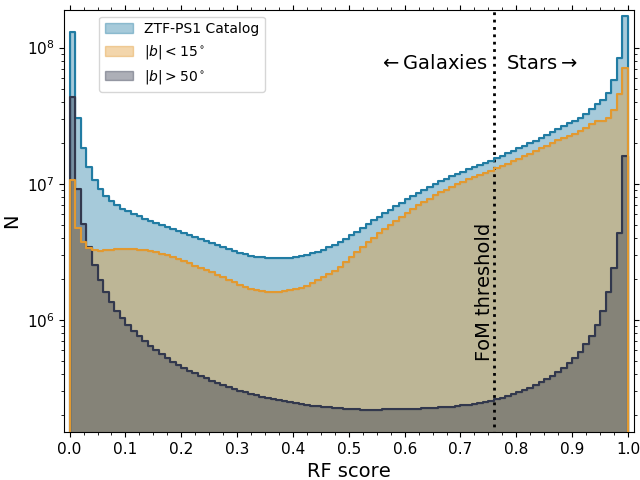

In [48]:
col_dict = {'mustard': "#E29930",
            'blue': "#217CA3",
            'asphalt': "#32384D"
           }

x_grid = np.repeat(np.linspace(0.0, 1, 101), 2)

fig, ax = plt.subplots()
ax.plot(x_grid, np.concatenate(([0], np.repeat(all_cnts, 2), [0])),
        color=col_dict['blue'])
ax.fill(x_grid, np.concatenate(([0], np.repeat(all_cnts, 2), [0])),
        alpha=0.4, color=col_dict['blue'], 
        label="ZTF-PS1 Catalog")
ax.plot(x_grid, np.concatenate(([0], np.repeat(low_cnts, 2), [0])), 
        color=col_dict['mustard'], zorder=10)
ax.fill(x_grid, np.concatenate(([0], np.repeat(low_cnts, 2), [0])),
        alpha=0.4, color=col_dict['mustard'],
        label=r"$|b| < 15^\circ$")
ax.plot(x_grid, np.concatenate(([0], np.repeat(high_cnts, 2), [0])), 
        color=col_dict['asphalt'])
ax.fill(x_grid, np.concatenate(([0], np.repeat(high_cnts, 2), [0])),
        alpha=0.4, color=col_dict['asphalt'],
        label=r"$|b| > 50^\circ$")

# ax.bar(np.linspace(0.005, .995, 100), low_cnts, width=0.01, lw=2, facecolor="None")
# ax.bar(np.linspace(0.005, .995, 100), high_cnts, width=0.01)
ax.set_yscale("log")
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(1.5e5, 1.9e8)
ax.tick_params(which="both", top=True, right=True, labelsize=11)
xminor = MultipleLocator(0.05)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.025))
ax.set_xlabel("RF score", fontsize=14)
ax.set_ylabel("N", fontsize=14)

ax.vlines([0.76], 10, 1e9, 
          linestyles=":", 
          color='k', lw=2)
ax.text(0.76, .4e7, 'FoM threshold', 
        color='k', 
        rotation=90, ha="right", fontsize=14)
ax.text(0.76, 7e7, r'$\leftarrow \mathrm{Galaxies}$  ', 
        color='k', 
        ha="right", fontsize=14)
ax.text(0.76, 7e7, r'  $\mathrm{Stars} \rightarrow$', 
        color='k', 
        ha="left", fontsize=14)

ax.legend(loc=2, bbox_to_anchor = (0.05,0,1,1), 
          bbox_transform=ax.transAxes)

fig.subplots_adjust(left=0.1,right=0.99,top=0.98,bottom=0.1)
fig.savefig("../paper/Figures/ZTF_PS1_cat_hist.pdf")

In [51]:
print("There are {:d} sources classified in the ZTF-PS1 catalog".format(sum(all_cnts)))
print("There are {:d} stars using the FoM threshold".format(sum(all_cnts[np.where(np.linspace(0,0.99,100) >= 0.76)])))
print("There are {:d} surefire stars (RF > 0.99)".format(all_cnts[-1]))
print("There are {:d} surefire galaxies (RF < 0.01)".format(all_cnts[0]))
print(" ")
print("At high (|b| > 50) latitudes:")
print("\t there are {:d} sources".format(sum(high_cnts)))
print("\t there are {:d} surefire galaxies (RF < 0.01)".format(high_cnts[0]))
print("\t there are {:d} stars using the FoM threshold".format(sum(high_cnts[np.where(np.linspace(0,0.99,100) >= 0.76)])))
print("\t there are {:d} 50-50 stars (RF >= 0.5)".format(sum(high_cnts[np.where(np.linspace(0,0.99,100) >= 0.5)])))
print(" ")
print("At low (|b| < 15) latitudes:")
print("\t there are {:d} sources".format(sum(low_cnts)))
print("\t there are {:d} surefire stars (RF > 0.99)".format(low_cnts[-1]))
print("\t there are {:d} stars using the FoM threshold".format(sum(low_cnts[np.where(np.linspace(0,0.99,100) >= 0.76)])))
print("\t there are {:d} 50-50 stars (RF >= 0.5)".format(sum(low_cnts[np.where(np.linspace(0,0.99,100) >= 0.5)])))

There are 1484281394 sources classified in the ZTF-PS1 catalog
There are 856826813 stars using the FoM threshold
There are 169499295 surefire stars (RF > 0.99)
There are 130213261 surefire galaxies (RF < 0.01)
 
At high (|b| > 50) latitudes:
	 there are 125168249 sources
	 there are 43266187 surefire galaxies (RF < 0.01)
	 there are 33567461 stars using the FoM threshold
	 there are 39489201 50-50 stars (RF >= 0.5)
 
At low (|b| < 15) latitudes:
	 there are 905745539 sources
	 there are 70890279 surefire stars (RF > 0.99)
	 there are 582072954 stars using the FoM threshold
	 there are 772453665 50-50 stars (RF >= 0.5)


## Run the Counting Loop

In [2]:
def get_hist_counts(df):

    rf_arr = np.array(df.rf_score)

    coords = SkyCoord(np.array(df.raStack)*u.deg, np.array(df.decStack)*u.deg)

    all_cnts, _ = np.histogram(rf_arr, range=(0,1), bins=100)
    low_lat = np.where(np.abs(coords.galactic.b) < 15*u.deg)
    high_lat = np.where(np.abs(coords.galactic.b) > 50*u.deg)

    low_cnts, _ = np.histogram(rf_arr[low_lat], range=(0,1), bins=100)
    high_cnts, _ = np.histogram(rf_arr[high_lat], range=(0,1), bins=100)
    
    return all_cnts, low_cnts, high_cnts

In [3]:
file_list = glob.glob("/Users/adamamiller/Desktop/PS1_fits/hdf5/*h5")

In [4]:
all_cnts = np.zeros(100, dtype=np.int64)
low_cnts = np.zeros_like(all_cnts)
high_cnts = np.zeros_like(all_cnts)

for file in file_list:
    df = pd.read_hdf(file)
    all_tmp, low_tmp, high_tmp = get_hist_counts(df)
    all_cnts += all_tmp
    low_cnts += low_tmp
    high_cnts += high_tmp